In [1]:
### Utility Functions
# from IPython.display import display, HTML
import pandas as pd
import sqlite3
import numpy as np
from sqlite3 import Error
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.formula.api as sm

In [2]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    if drop_table_name:  # You can optionally pass drop_table_name to drop the table.
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)

    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)


def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [3]:
filename = 'eas503_city_temperature.db'
conn = create_connection(filename)

sql_statement = '''SELECT TemperatureValue, Month, Year, Date FROM Temperature WHERE City = "New York City" GROUP BY Year, Month, Date'''
#sql_statement = '''SELECT * FROM Temperature'''
df = pd.read_sql_query(sql_statement, conn)


In [4]:
sql_statement = 'select * FROM Temperature'
df = pd.read_sql_query(sql_statement, conn)

#l1=plt.plot(df_n['Year'], df_n['AvgTemp'], 'r--', label='New York City')
display(df)

,TemperatureID,TemperatureValue,Region,Country,City,Year,Month,Date
0,1,50.7,North America,US,Birmingham,1995,1,1
1,2,37.2,North America,US,Birmingham,1995,1,2
2,3,33.2,North America,US,Birmingham,1995,1,3
3,4,33.3,North America,US,Birmingham,1995,1,4
4,5,26.4,North America,US,Birmingham,1995,1,5
...,...,...,...,...,...,...,...,...
1455332,1455333,82.4,North America,US,San Juan Puerto Rico,2013,7,27
1455333,1455334,81.6,North America,US,San Juan Puerto Rico,2013,7,28
1455334,1455335,84.2,North America,US,San Juan Puerto Rico,2013,7,29
1455335,1455336,83.8,North America,US,San Juan Puerto Rico,2013,7,30


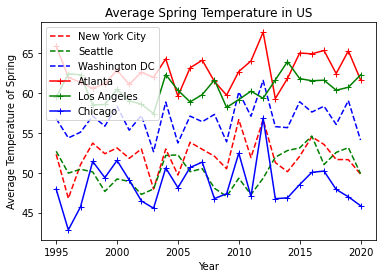

,AvgTemp_New_York,AvgTemp_Seattle,AvgTemp_Washington_DC,AvgTemp_Atlanta,AvgTemp_Los_Angeles,AvgTemp_Chicago
count,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000
mean,52.102570,50.371525,56.739090,62.798357,60.410489,48.655139
std,12.837597,8.015560,12.225261,10.496492,6.202952,13.805057
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,44.400000,45.900000,48.600000,56.600000,57.925000,39.525000
50%,52.600000,49.900000,57.200000,63.900000,60.200000,48.900000
75%,59.700000,54.700000,65.200000,70.500000,62.700000,58.000000
max,88.100000,80.500000,85.500000,84.600000,82.700000,85.900000


In [5]:
sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="New York City" AND Month IN (3,4,5) group by Year, Month, Date'
df_N = pd.read_sql_query(sql_statement, conn)
df_n = df_N.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l1=plt.plot(df_n['Year'], df_n['AvgTemp'], 'r--', label='New York City')
df_N = df_N.rename(columns = {'AvgTemp' : 'AvgTemp_New_York'})


sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Seattle" AND Month IN (3,4,5) group by Year, Month, Date'
df_S = pd.read_sql_query(sql_statement, conn)
df_s = df_S.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l2=plt.plot(df_s['Year'], df_s['AvgTemp'], 'g--', label='Seattle')
df_S = df_S.rename(columns = {'AvgTemp' : 'AvgTemp_Seattle'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Washington DC" AND Month IN (3,4,5) group by Year, Month, Date'
df_W = pd.read_sql_query(sql_statement, conn)
df_w = df_W.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l3=plt.plot(df_w['Year'], df_w['AvgTemp'], 'b--', label='Washington DC')
df_W = df_W.rename(columns = {'AvgTemp' : 'AvgTemp_Washington_DC'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Atlanta" AND Month IN (3,4,5) group by Year, Month, Date'
df_A = pd.read_sql_query(sql_statement, conn)
df_a = df_A.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l4=plt.plot(df_a['Year'], df_a['AvgTemp'], 'r-+', label='Atlanta')
df_A = df_A.rename(columns = {'AvgTemp' : 'AvgTemp_Atlanta'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Los Angeles" AND Month IN (3,4,5) group by Year, Month, Date'
df_L = pd.read_sql_query(sql_statement, conn)
df_l = df_L.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l5=plt.plot(df_l['Year'], df_l['AvgTemp'], 'g-+', label='Los Angeles')
df_L = df_L.rename(columns = {'AvgTemp' : 'AvgTemp_Los_Angeles'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Chicago" AND Month IN (3,4,5) group by Year, Month, Date'
df_C = pd.read_sql_query(sql_statement, conn)
df_c = df_C.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l6=plt.plot(df_c['Year'], df_c['AvgTemp'],  'b-+', label='Chicago')
df_C = df_C.rename(columns = {'AvgTemp' : 'AvgTemp_Chicago'})


plt.title('Average Spring Temperature in US')
plt.xlabel('Year')
plt.ylabel('Average Temperature of Spring')
plt.legend()
plt.show()
#display(df_n)

df_merge = df_N['AvgTemp_New_York'].to_frame().merge(df_S['AvgTemp_Seattle'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_W['AvgTemp_Washington_DC'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_A['AvgTemp_Atlanta'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_L['AvgTemp_Los_Angeles'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_C['AvgTemp_Chicago'],left_index=True, right_index=True)

display(df_merge.describe())

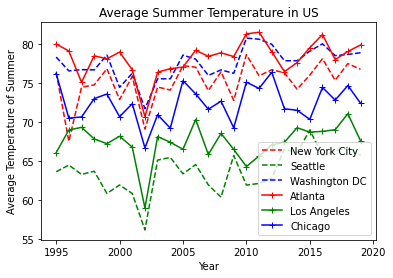

,AvgTemp_New_York,AvgTemp_Seattle,AvgTemp_Washington_DC,AvgTemp_Atlanta,AvgTemp_Los_Angeles,AvgTemp_Chicago
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,75.143043,63.773261,77.488087,78.195783,67.413739,72.379696
std,11.991370,10.145663,10.453050,9.235075,8.469580,10.237857
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,72.000000,60.100000,74.800000,76.000000,65.400000,68.700000
50%,76.100000,63.700000,78.100000,78.700000,67.600000,73.200000
75%,79.800000,67.800000,81.500000,81.300000,69.700000,77.200000
max,93.700000,87.700000,92.800000,92.800000,82.100000,92.300000


In [6]:
sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="New York City" AND Month IN (6,7,8) group by Year, Month, Date'
df_N = pd.read_sql_query(sql_statement, conn)
df_n = df_N.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l1=plt.plot(df_n['Year'], df_n['AvgTemp'], 'r--', label='New York City')
df_N = df_N.rename(columns = {'AvgTemp' : 'AvgTemp_New_York'})


sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Seattle" AND Month IN (6,7,8) group by Year, Month, Date'
df_S = pd.read_sql_query(sql_statement, conn)
df_s = df_S.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l2=plt.plot(df_s['Year'], df_s['AvgTemp'], 'g--', label='Seattle')
df_S = df_S.rename(columns = {'AvgTemp' : 'AvgTemp_Seattle'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Washington DC" AND Month IN (6,7,8) group by Year, Month, Date'
df_W = pd.read_sql_query(sql_statement, conn)
df_w = df_W.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l3=plt.plot(df_w['Year'], df_w['AvgTemp'], 'b--', label='Washington DC')
df_W = df_W.rename(columns = {'AvgTemp' : 'AvgTemp_Washington_DC'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Atlanta" AND Month IN (6,7,8) group by Year, Month, Date'
df_A = pd.read_sql_query(sql_statement, conn)
df_a = df_A.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l4=plt.plot(df_a['Year'], df_a['AvgTemp'], 'r-+', label='Atlanta')
df_A = df_A.rename(columns = {'AvgTemp' : 'AvgTemp_Atlanta'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Los Angeles" AND Month IN (6,7,8) group by Year, Month, Date'
df_L = pd.read_sql_query(sql_statement, conn)
df_l = df_L.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l5=plt.plot(df_l['Year'], df_l['AvgTemp'], 'g-+', label='Los Angeles')
df_L = df_L.rename(columns = {'AvgTemp' : 'AvgTemp_Los_Angeles'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Chicago" AND Month IN (6,7,8) group by Year, Month, Date'
df_C = pd.read_sql_query(sql_statement, conn)
df_c = df_C.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l6=plt.plot(df_c['Year'], df_c['AvgTemp'],  'b-+', label='Chicago')
df_C = df_C.rename(columns = {'AvgTemp' : 'AvgTemp_Chicago'})


plt.title('Average Summer Temperature in US')
plt.xlabel('Year')
plt.ylabel('Average Temperature of Summer')
plt.legend()
plt.show()
#display(df_n)

df_merge = df_N['AvgTemp_New_York'].to_frame().merge(df_S['AvgTemp_Seattle'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_W['AvgTemp_Washington_DC'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_A['AvgTemp_Atlanta'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_L['AvgTemp_Los_Angeles'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_C['AvgTemp_Chicago'],left_index=True, right_index=True)

display(df_merge.describe())

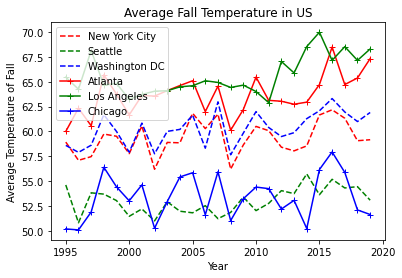

,AvgTemp_New_York,AvgTemp_Seattle,AvgTemp_Washington_DC,AvgTemp_Atlanta,AvgTemp_Los_Angeles,AvgTemp_Chicago
count,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000
mean,59.302242,53.008615,60.282725,63.666637,65.596659,53.388571
std,12.269376,9.021239,12.644627,11.510838,6.246307,14.161682
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,50.950000,47.800000,51.500000,55.700000,62.100000,43.900000
50%,59.800000,53.200000,60.900000,65.000000,65.300000,54.000000
75%,68.300000,58.600000,69.900000,72.400000,68.600000,63.700000
max,87.000000,77.100000,86.100000,87.200000,86.000000,86.800000


In [7]:
sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="New York City" AND Month IN (9,10,11) group by Year, Month, Date'
df_N = pd.read_sql_query(sql_statement, conn)
df_n = df_N.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l1=plt.plot(df_n['Year'], df_n['AvgTemp'], 'r--', label='New York City')
df_N = df_N.rename(columns = {'AvgTemp' : 'AvgTemp_New_York'})


sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Seattle" AND Month IN (9,10,11) group by Year, Month, Date'
df_S = pd.read_sql_query(sql_statement, conn)
df_s = df_S.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l2=plt.plot(df_s['Year'], df_s['AvgTemp'], 'g--', label='Seattle')
df_S = df_S.rename(columns = {'AvgTemp' : 'AvgTemp_Seattle'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Washington DC" AND Month IN (9,10,11) group by Year, Month, Date'
df_W = pd.read_sql_query(sql_statement, conn)
df_w = df_W.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l3=plt.plot(df_w['Year'], df_w['AvgTemp'], 'b--', label='Washington DC')
df_W = df_W.rename(columns = {'AvgTemp' : 'AvgTemp_Washington_DC'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Atlanta" AND Month IN (9,10,11) group by Year, Month, Date'
df_A = pd.read_sql_query(sql_statement, conn)
df_a = df_A.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l4=plt.plot(df_a['Year'], df_a['AvgTemp'], 'r-+', label='Atlanta')
df_A = df_A.rename(columns = {'AvgTemp' : 'AvgTemp_Atlanta'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Los Angeles" AND Month IN (9,10,11) group by Year, Month, Date'
df_L = pd.read_sql_query(sql_statement, conn)
df_l = df_L.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l5=plt.plot(df_l['Year'], df_l['AvgTemp'], 'g-+', label='Los Angeles')
df_L = df_L.rename(columns = {'AvgTemp' : 'AvgTemp_Los_Angeles'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Chicago" AND Month IN (9,10,11) group by Year, Month, Date'
df_C = pd.read_sql_query(sql_statement, conn)
df_c = df_C.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l6=plt.plot(df_c['Year'], df_c['AvgTemp'],  'b-+', label='Chicago')
df_C = df_C.rename(columns = {'AvgTemp' : 'AvgTemp_Chicago'})


plt.title('Average Fall Temperature in US')
plt.xlabel('Year')
plt.ylabel('Average Temperature of Fall')
plt.legend()
plt.show()
#display(df_n)

df_merge = df_N['AvgTemp_New_York'].to_frame().merge(df_S['AvgTemp_Seattle'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_W['AvgTemp_Washington_DC'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_A['AvgTemp_Atlanta'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_L['AvgTemp_Los_Angeles'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_C['AvgTemp_Chicago'],left_index=True, right_index=True)

display(df_merge.describe())

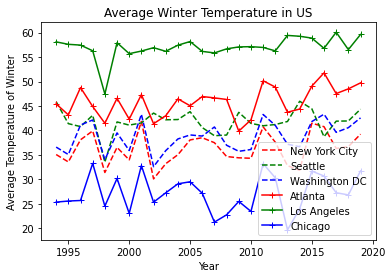

,AvgTemp_New_York,AvgTemp_Seattle,AvgTemp_Washington_DC,AvgTemp_Atlanta,AvgTemp_Los_Angeles,AvgTemp_Chicago
count,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000
mean,36.302763,41.698705,38.784974,45.831908,56.994732,27.204361
std,11.496501,9.047959,11.474553,12.207318,8.978417,13.536275
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,30.600000,38.600000,33.200000,39.400000,54.700000,20.400000
50%,36.850000,42.400000,39.200000,45.700000,57.000000,28.800000
75%,42.725000,46.000000,44.800000,53.300000,59.700000,34.925000
max,65.000000,57.000000,67.200000,70.700000,73.600000,62.000000


In [8]:
n = lambda x: int(x['Year']-1) if x['Month'] != 12 else int(x['Year'])

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="New York City" AND Month IN (12,1,2) group by Year, Month, Date'
df_N = pd.read_sql_query(sql_statement, conn)
df_N['Year'] = df_N.apply(n, axis = 1)
df_n = df_N.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l1=plt.plot(df_n['Year'], df_n['AvgTemp'], 'r--', label='New York City')
df_N = df_N.rename(columns = {'AvgTemp' : 'AvgTemp_New_York'})


sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Seattle" AND Month IN (12,1,2) group by Year, Month, Date'
df_S = pd.read_sql_query(sql_statement, conn)
df_S['Year'] = df_S.apply(n, axis = 1)
df_s = df_S.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l2=plt.plot(df_s['Year'], df_s['AvgTemp'], 'g--', label='Seattle')
df_S = df_S.rename(columns = {'AvgTemp' : 'AvgTemp_Seattle'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Washington DC" AND Month IN (12,1,2) group by Year, Month, Date'
df_W = pd.read_sql_query(sql_statement, conn)
df_W['Year'] = df_W.apply(n, axis = 1)
df_w = df_W.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l3=plt.plot(df_w['Year'], df_w['AvgTemp'], 'b--', label='Washington DC')
df_W = df_W.rename(columns = {'AvgTemp' : 'AvgTemp_Washington_DC'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Atlanta" AND Month IN (12,1,2) group by Year, Month, Date'
df_A = pd.read_sql_query(sql_statement, conn)
df_A['Year'] = df_A.apply(n, axis = 1)
df_a = df_A.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l4=plt.plot(df_a['Year'], df_a['AvgTemp'], 'r-+', label='Atlanta')
df_A = df_A.rename(columns = {'AvgTemp' : 'AvgTemp_Atlanta'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Los Angeles" AND Month IN (12,1,2) group by Year, Month, Date'
df_L = pd.read_sql_query(sql_statement, conn)
df_L['Year'] = df_L.apply(n, axis = 1)
df_l = df_L.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l5=plt.plot(df_l['Year'], df_l['AvgTemp'], 'g-+', label='Los Angeles')
df_L = df_L.rename(columns = {'AvgTemp' : 'AvgTemp_Los_Angeles'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Chicago" AND Month IN (12,1,2) group by Year, Month, Date'
df_C = pd.read_sql_query(sql_statement, conn)
df_C['Year'] = df_C.apply(n, axis = 1)
df_c = df_C.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l6=plt.plot(df_c['Year'], df_c['AvgTemp'],  'b-+', label='Chicago')
df_C = df_C.rename(columns = {'AvgTemp' : 'AvgTemp_Chicago'})


plt.title('Average Winter Temperature in US')
plt.xlabel('Year')
plt.ylabel('Average Temperature of Winter')
plt.legend()
plt.show()
#display(df_n)

df_merge = df_N['AvgTemp_New_York'].to_frame().merge(df_S['AvgTemp_Seattle'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_W['AvgTemp_Washington_DC'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_A['AvgTemp_Atlanta'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_L['AvgTemp_Los_Angeles'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_C['AvgTemp_Chicago'],left_index=True, right_index=True)

display(df_merge.describe())

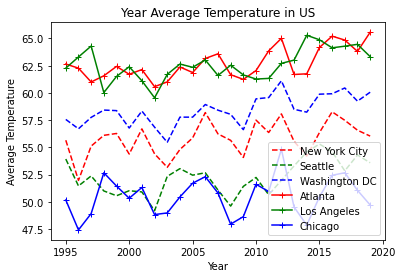

,AvgTemp_New_York,AvgTemp_Seattle,AvgTemp_Washington_DC,AvgTemp_Atlanta,AvgTemp_Los_Angeles,AvgTemp_Chicago
count,9131.000000,9131.000000,9131.000000,9131.000000,9131.000000,9131.000000
mean,55.795324,52.248220,58.405706,62.688599,62.587482,50.512715
std,18.564105,12.057238,18.116877,15.866271,8.670506,20.733877
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,42.200000,44.700000,44.550000,51.500000,58.350000,35.000000
50%,56.400000,51.600000,59.400000,64.800000,62.800000,51.500000
75%,71.500000,60.400000,74.100000,75.800000,67.100000,68.300000
max,93.700000,87.700000,92.800000,92.800000,86.000000,92.300000


In [9]:
sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="New York City" group by Year, Month, Date'
df_N = pd.read_sql_query(sql_statement, conn)
df_N = df_N.drop(np.arange(9131,9265))
df_n = df_N.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l1=plt.plot(df_n['Year'], df_n['AvgTemp'], 'r--', label='New York City')
df_N = df_N.rename(columns = {'AvgTemp' : 'AvgTemp_New_York'})


sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Seattle" group by Year, Month, Date'
df_S = pd.read_sql_query(sql_statement, conn)
df_S = df_S.drop(np.arange(9131,9265))
df_s = df_S.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l2=plt.plot(df_s['Year'], df_s['AvgTemp'], 'g--', label='Seattle')
df_S = df_S.rename(columns = {'AvgTemp' : 'AvgTemp_Seattle'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Washington DC" group by Year, Month, Date'
df_W = pd.read_sql_query(sql_statement, conn)
df_W = df_W.drop(np.arange(9131,9265))
df_w = df_W.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l3=plt.plot(df_w['Year'], df_w['AvgTemp'], 'b--', label='Washington DC')
df_W = df_W.rename(columns = {'AvgTemp' : 'AvgTemp_Washington_DC'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Atlanta" group by Year, Month, Date'
df_A = pd.read_sql_query(sql_statement, conn)
df_A = df_A.drop(np.arange(9131,9265))
df_a = df_A.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l4=plt.plot(df_a['Year'], df_a['AvgTemp'], 'r-+', label='Atlanta')
df_A = df_A.rename(columns = {'AvgTemp' : 'AvgTemp_Atlanta'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Los Angeles" group by Year, Month, Date'
df_L = pd.read_sql_query(sql_statement, conn)
df_L = df_L.drop(np.arange(9131,9265))
df_l = df_L.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l5=plt.plot(df_l['Year'], df_l['AvgTemp'], 'g-+', label='Los Angeles')
df_L = df_L.rename(columns = {'AvgTemp' : 'AvgTemp_Los_Angeles'})

sql_statement = 'select Year, TemperatureValue as AvgTemp, Month from Temperature WHERE City="Chicago" group by Year, Month, Date'
df_C = pd.read_sql_query(sql_statement, conn)
df_C = df_C.drop(np.arange(9131,9265))
df_c = df_C.groupby(['Year'])['AvgTemp'].mean().round(2).to_frame().reset_index()
l6=plt.plot(df_c['Year'], df_c['AvgTemp'],  'b-+', label='Chicago')
df_C = df_C.rename(columns = {'AvgTemp' : 'AvgTemp_Chicago'})


plt.title('Year Average Temperature in US')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()
#display(df_n)

df_merge = df_N['AvgTemp_New_York'].to_frame().merge(df_S['AvgTemp_Seattle'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_W['AvgTemp_Washington_DC'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_A['AvgTemp_Atlanta'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_L['AvgTemp_Los_Angeles'],left_index=True, right_index=True)
df_merge = df_merge.merge(df_C['AvgTemp_Chicago'],left_index=True, right_index=True)

display(df_merge.describe())

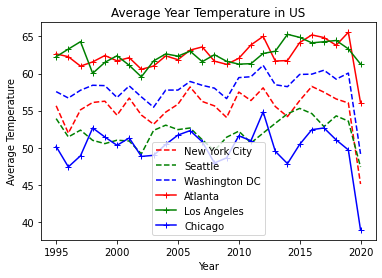

In [10]:

sql_statement = 'select Year, round(avg(TemperatureValue),2) as AvgTemp from Temperature where City="New York City" group by year'
df = pd.read_sql_query(sql_statement, conn)
l1=plt.plot(df['Year'], df['AvgTemp'], 'r--', label='New York City')

sql_statement = 'select Year, round(avg(TemperatureValue),2) as AvgTemp from Temperature where City="Seattle" group by year'
df = pd.read_sql_query(sql_statement, conn)
l2=plt.plot(df['Year'], df['AvgTemp'], 'g--', label='Seattle')

sql_statement = 'select Year, round(avg(TemperatureValue),2) as AvgTemp from Temperature where City="Washington DC" group by year'
df = pd.read_sql_query(sql_statement, conn)
l3=plt.plot(df['Year'], df['AvgTemp'], 'b--', label='Washington DC')

sql_statement = 'select Year, round(avg(TemperatureValue),2) as AvgTemp from Temperature where City="Atlanta" group by year'
df = pd.read_sql_query(sql_statement, conn)
l4=plt.plot(df['Year'], df['AvgTemp'], 'r-+', label='Atlanta')

sql_statement = 'select Year, round(avg(TemperatureValue),2) as AvgTemp from Temperature where City="Los Angeles" group by year'
df = pd.read_sql_query(sql_statement, conn)
l5=plt.plot(df['Year'], df['AvgTemp'], 'g-+', label='Los Angeles')

sql_statement = 'select Year, round(avg(TemperatureValue),2) as AvgTemp from Temperature where City="Chicago" group by year'
df = pd.read_sql_query(sql_statement, conn)
l6=plt.plot(df['Year'], df['AvgTemp'], 'b-+', label='Chicago')

plt.title('Average Year Temperature in US')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()


In [16]:
def prediction(city):

    sql_statement = f'select Year, round(avg(TemperatureValue),2) as AvgTemp from Temperature where City="{city}" group by year'
    df = pd.read_sql_query(sql_statement, conn)
    df =df.drop([25])
    y = df.iloc[:, 1]
    x = df.iloc[:, 0]
    model = sm.ols('y~x', df).fit()
    predicts = model.predict()
    plt.title(f'Temperature Prediction in {city}')
    plt.scatter(x, y, label='observation')
    plt.plot(x, predicts, color = 'red', label='prediction')
    plt.legend() 
    plt.show()
    return
    


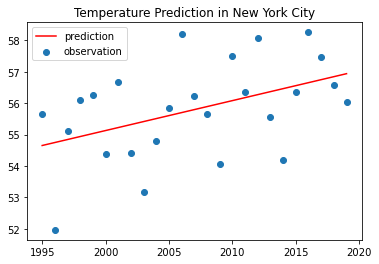

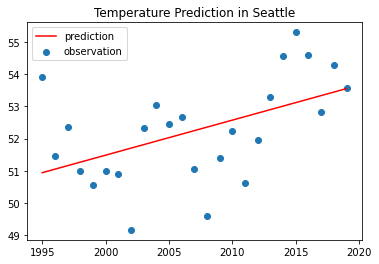

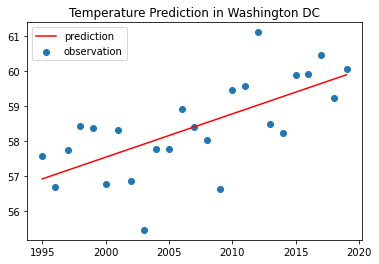

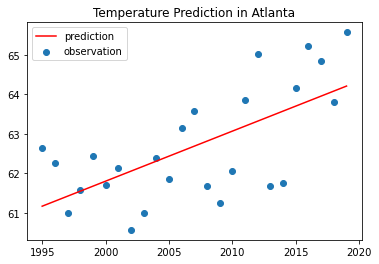

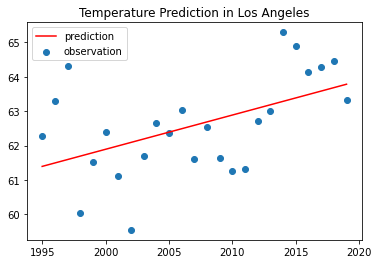

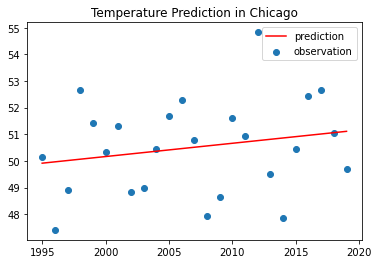

In [17]:
prediction("New York City")
prediction("Seattle")
prediction("Washington DC")
prediction("Atlanta")
prediction("Los Angeles")
prediction("Chicago")
